# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/FoodHub Proyect/foodhub_order.csv"
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Shape function shows the number of rows and columns in the data
print('The number of rows and columns is ',df.shape)

the number of rows and columns is  (1898, 9)


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Calling function info()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: Using the .info() function we can see that that are no counts of columns with missing values.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Calling the function describe() that provides minimum, average, maximum and more
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


Observations: For the food preparation time we have the following data:
mean: 27.37s
Max: 35 s
Min: 20 s


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#Create a boolean series identifying orders with 'Not given' rating
print(df['rating'].unique())
not_rated_orders= df['rating']=='Not given'

# Print the count of orders with 'Not given' rating
print('The amount of not rated orders is', not_rated_orders.sum())


['Not given' '5' '3' '4']
The amount of not rated orders is 736


#### Observations: 736 orders are not rated, this means most of the orders don't have a rating


### Exploratory Data Analysis (EDA)





### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    numeric_feature = pd.to_numeric(feature, errors='coerce').dropna()
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()




**Numerical variables.**

**Observation on Food Preparation Time:**

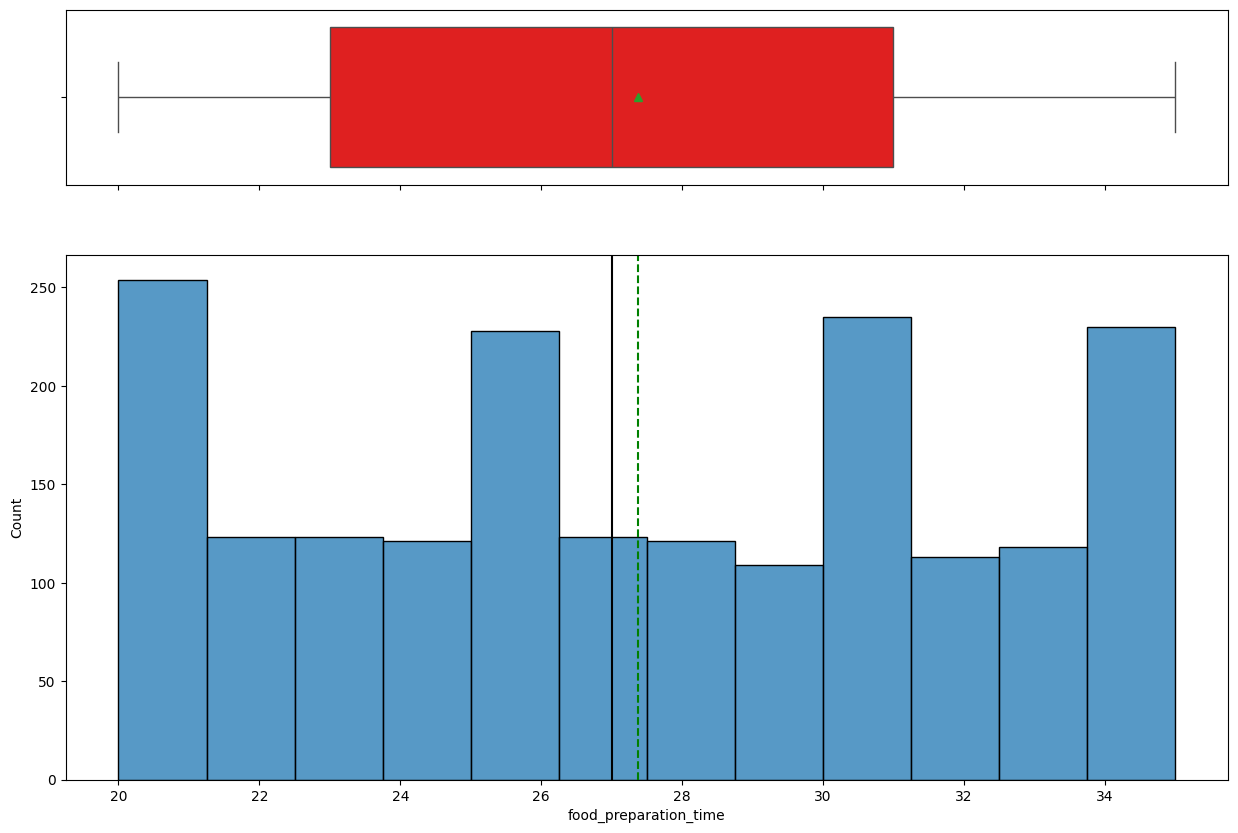

0.03646881825816354

In [ ]:
histogram_boxplot(df.food_preparation_time)
df.food_preparation_time.skew()

**Observations:**


*   Skew is close to zero, suggesting the data is balanced
*   There are no outliers



**Observation on Delivery Time:**

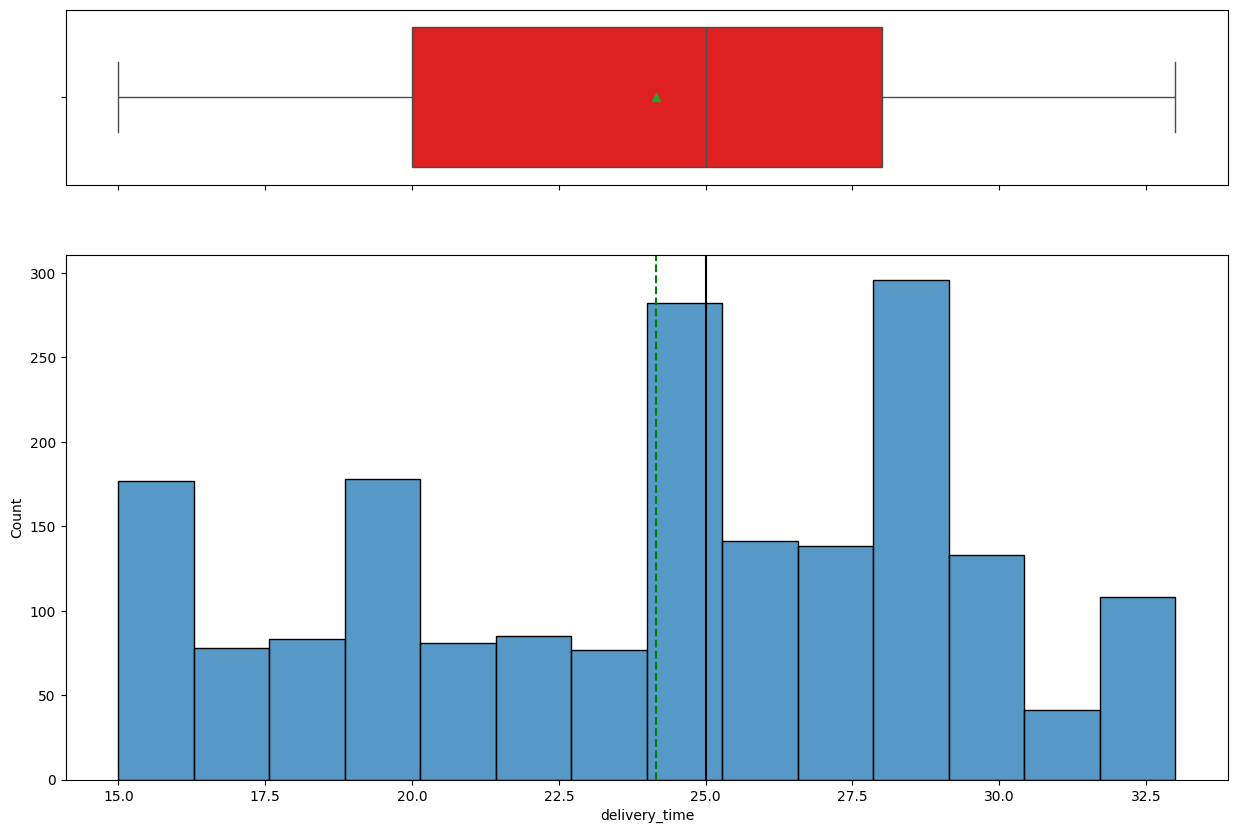

-0.23653630513419896

In [ ]:
histogram_boxplot(df.delivery_time)
df.delivery_time.skew()

**Observations:**
  * The average and median are both close to 25 mins
  * There are no outliers
  * Has a slight negative skeweness. This means a slightly left side skew

**Observation on Cost of Order:**

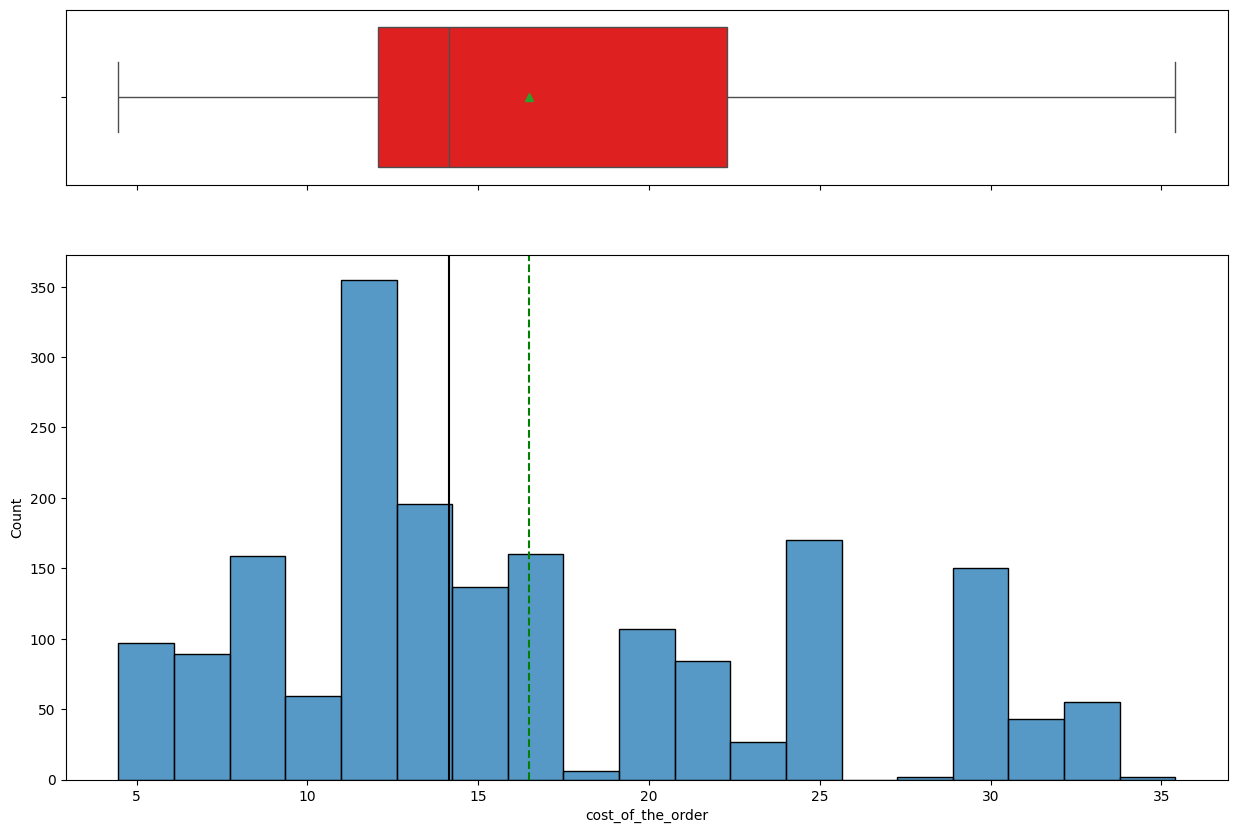

0.6217469995871637

In [ ]:
histogram_boxplot(df.cost_of_the_order)
df.cost_of_the_order.skew()

**Observations:**
  *  Positive skewness indicates a right side skew
  *  There are some orders with higher costs

**Categorical variables**

In [ ]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, hue= z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class

        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot

        y = p.get_y() + p.get_height()                              # Height of the plot

        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

**Observations on ratings:**

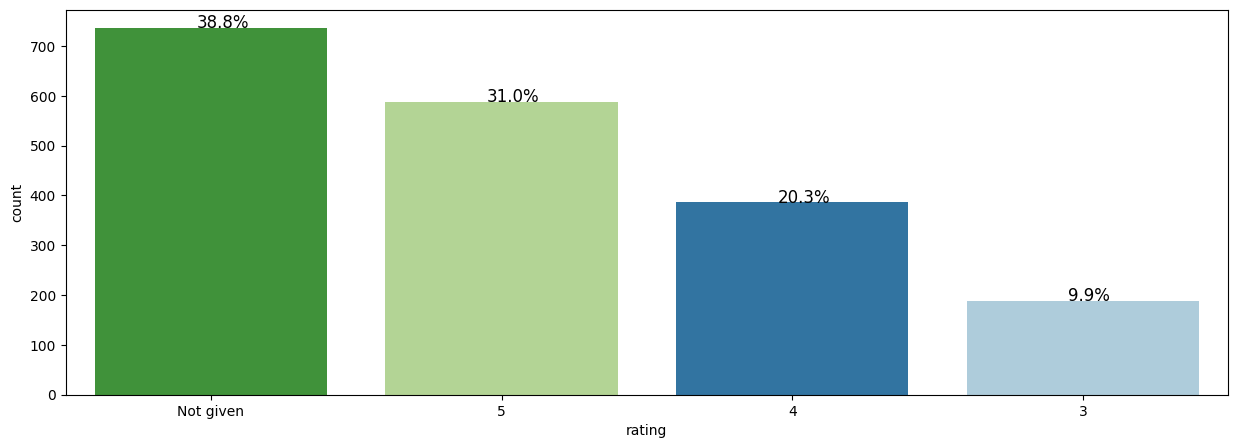

In [ ]:
bar_perc(df,'rating')

**Observations:**
  *  Most of the orders were not rated with 38%
  *  The most given rating was a 5

**Observations of Day of the Week:**

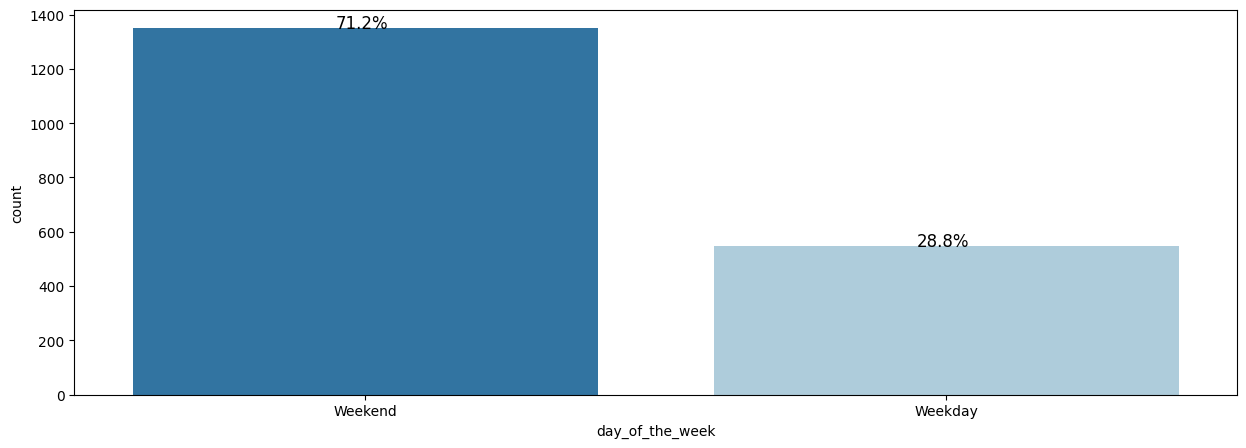

In [ ]:
# Bar chart for day of the week
bar_perc(df, 'day_of_the_week')

Observations:
  *  Most of the orders are done on weekends. With a 71.2%

**Observations on Cuisine Type:**

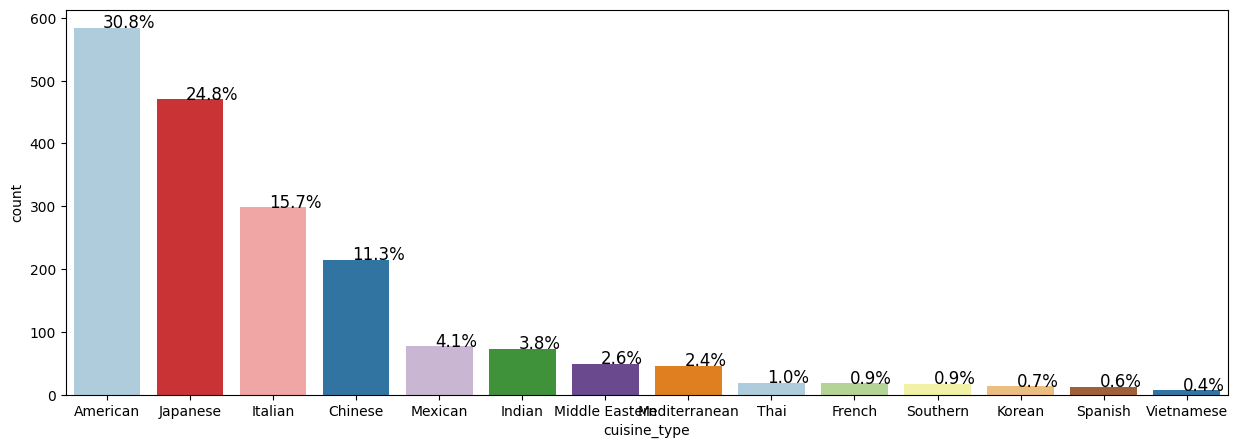

In [ ]:
# Bar chart for cuisine type
bar_perc(df, 'cuisine_type')

Observations:
  *  American and Japanese cuisines are the most popular among orders, followed by Italian. These 3 make up a 71.3% of all orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

The top 5 restaurants by numbers of orders are 
 Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


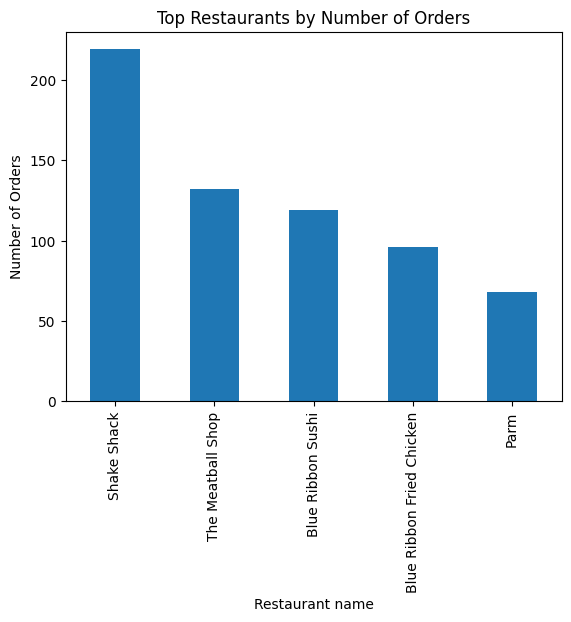

In [ ]:
# Using the function value_counts() on the restaurant names we get number of value each unique restaurant_name has, then using the function head() we get the first 5 elements
print('The top 5 restaurants by numbers of orders are','\n',df['restaurant_name'].value_counts().head(5))


df['restaurant_name'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Restaurant name')
plt.ylabel('Number of Orders')
plt.title(f'Top Restaurants by Number of Orders')
plt.show()





#### Observations: The Shake Shack restaurant has the most orders received, more than 80 compared to the next restaurant on the top 5


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

List of the most popular cuisine types on weekends 
 American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


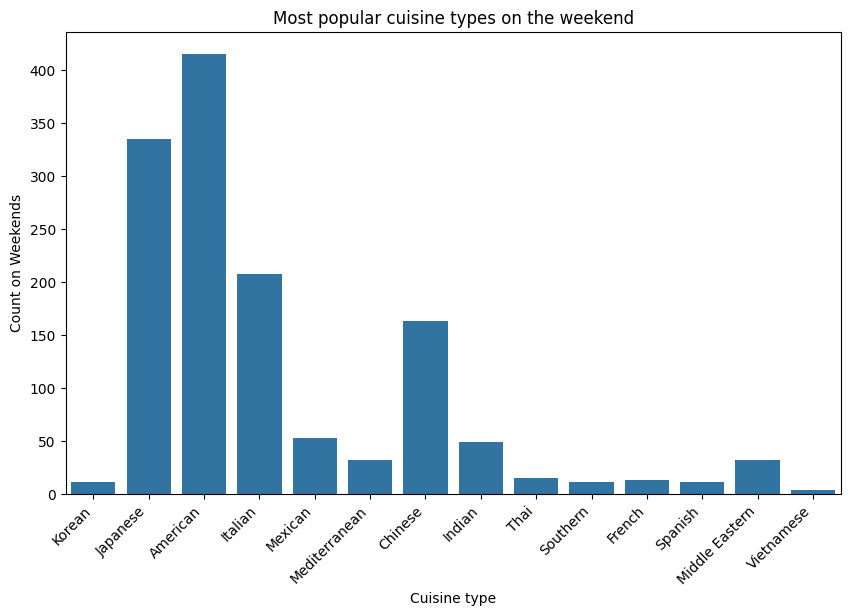

In [ ]:
# We set the WeekendDf variable, which includes only the days of the week set as weekend, then with the function .value_counts() we access to the count of each cuisine_type only for weekend days
WeekendDf = df[df['day_of_the_week']=='Weekend']


print('List of the most popular cuisine types on weekends','\n', WeekendDf['cuisine_type'].value_counts() )

# Count plot for top cuisines on weekends
plt.figure(figsize=(10, 6))
sns.countplot(x=WeekendDf['cuisine_type'])
plt.xlabel('Cuisine type')
plt.ylabel('Count on Weekends')
plt.title(f'Most popular cuisine types on the weekend')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



#### Observations: American and Japanese cuisines are the most popular cuisines among all orders followed by the Italian


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the percentage of orders that cost more than 20 dollars
percentage_above_20 = (df['cost_of_the_order'] > 20).mean() * 100
print('The percentage of orders that cost more than 20 dollars is %', percentage_above_20)




The percentage of orders that cost more than 20 dollars is % 29.24130663856691


#### Observations: A percentage of 29% orders cost more than 20 dollars, more than a quater of the orders are above 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Using the .mean() function we get the mean of the delivery time
print('The order delivery time is',df['delivery_time'].mean(), 'minutes')

The order delivery time is 24.161749209694417 minutes


#### Observations: The order delivery time is 24.161749209694417 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


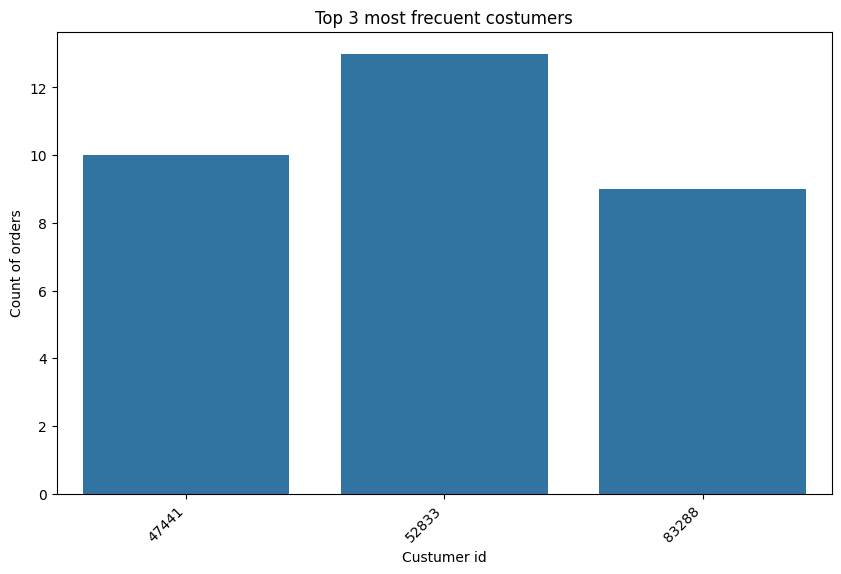

In [ ]:
# Display the top 3 most frequent customer IDs along with their order counts
print(df['customer_id'].value_counts().head(3))

# Create a bar plot for the top 3 most frequent customer IDs
plt.figure(figsize=(10, 6))
sns.barplot(x=df['customer_id'].value_counts().head(3).index,y=df['customer_id'].value_counts().head(3))
plt.xlabel('Custumer id')
plt.ylabel('Count of orders')
plt.title(f'Top 3 most frecuent costumers')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Observations: We have the customer id of the most frecuent costumer among all orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Correlation**

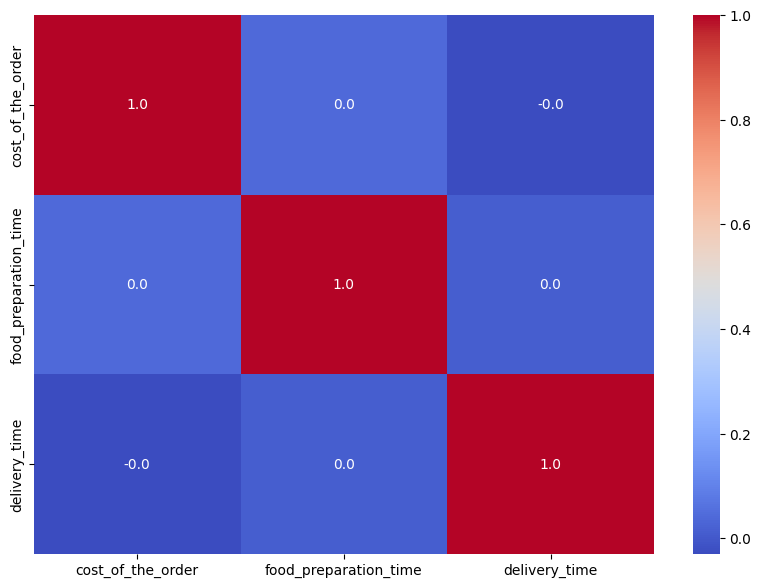

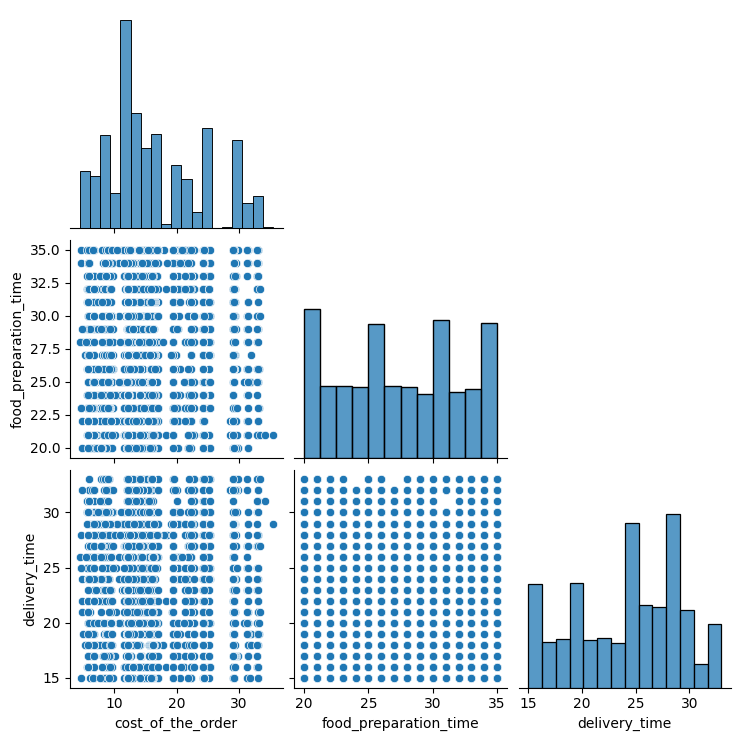

In [ ]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            fmt = ".1f",
            xticklabels = corr.columns,
            yticklabels = corr.columns);

sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']], corner=True);

Observations:
  * Doesn't seem to be a correlation between numerical variables

Relationship between cuisine type and other variables

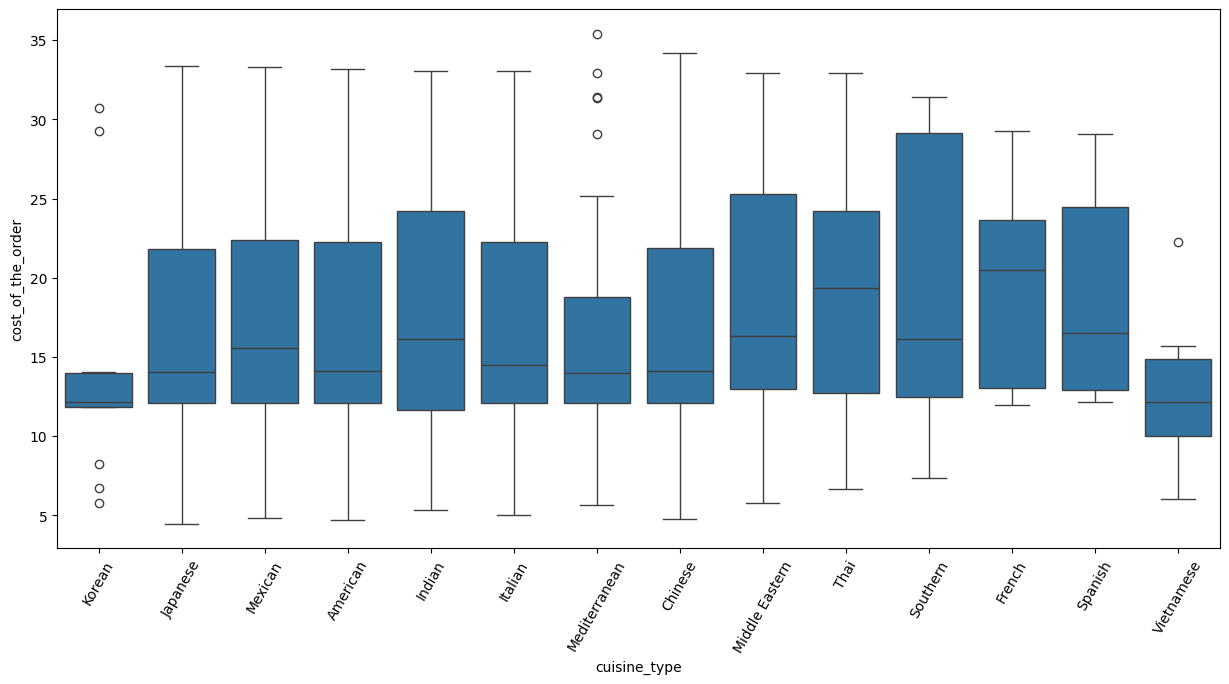

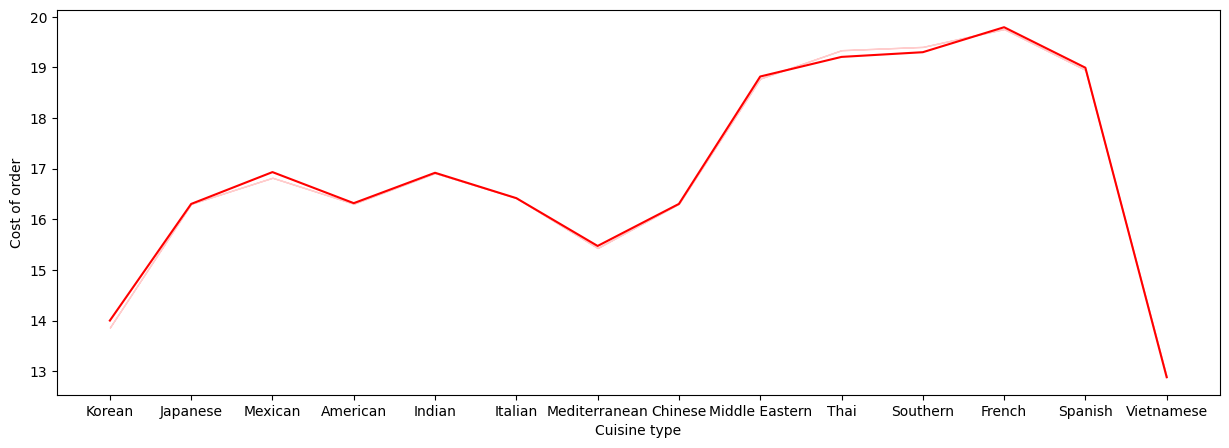

In [ ]:
# Relationship between cuisine type and cost of order

#Box plot for cuisine type vs cost of order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

#Lineplot for cuisine type vs cost of order
plt.figure(figsize = (15, 5))
sns.lineplot(x = "cuisine_type", y = "cost_of_the_order", errorbar=('ci', 0), data = df, color = "RED")
plt.ylabel('Cost of order')
plt.xlabel('Cuisine type')
plt.show();



Observations:
  *  Some outliers in Korean, Mediterranean and Vietnamese cuisines
  *  Some Southern cuisine orders cost more than the rest but on average are similiar to the rest
  *  Vietnamise food is the cheapest amoung all cuisines, Korean is close

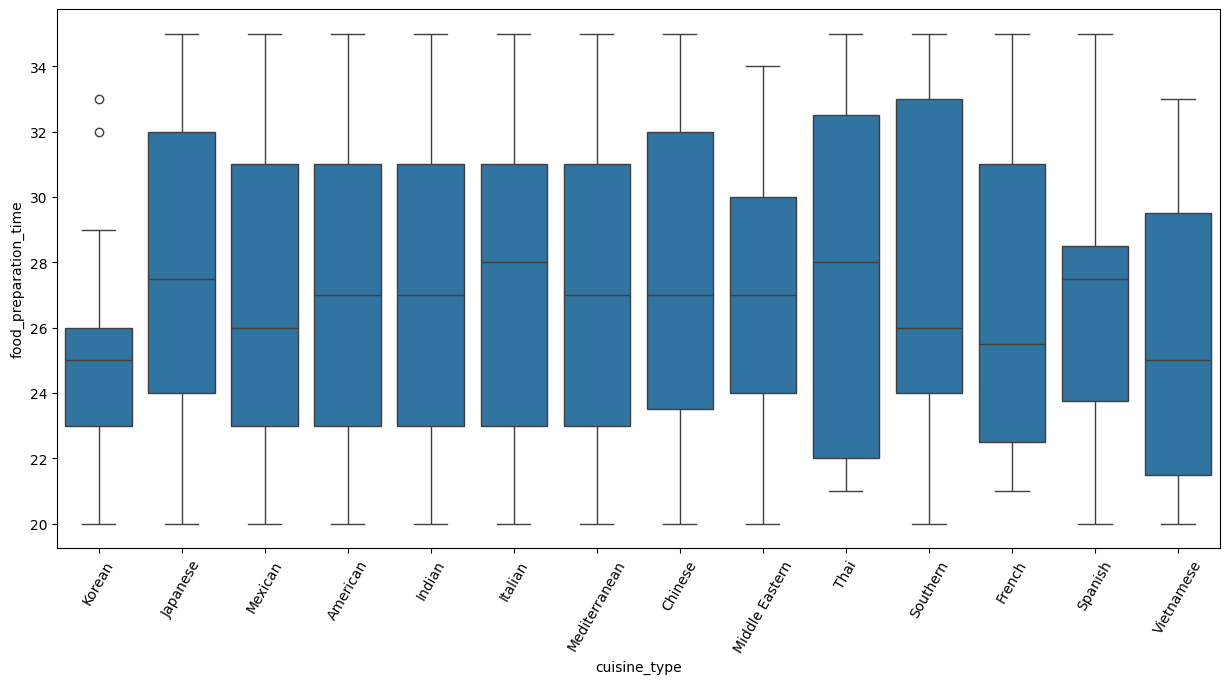

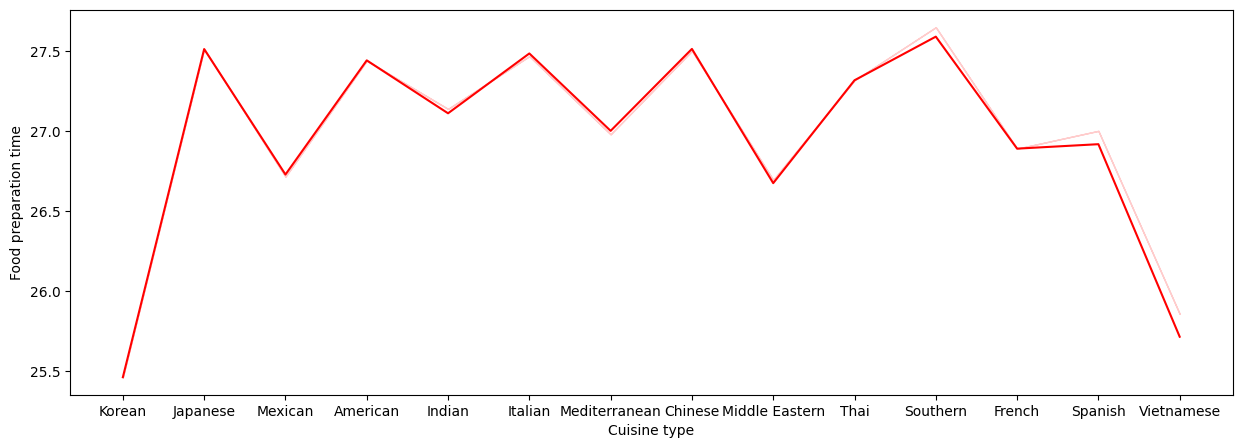

In [ ]:
# Relationship between cuisine type and preparation time

#Box plot for cuisine type vs preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

#Lineplot for cuisine type vs cost of order
plt.figure(figsize = (15, 5))
sns.lineplot(x = "cuisine_type", y = "food_preparation_time", errorbar=('ci', 0), data = df, color = "RED")
plt.ylabel('Food preparation time')
plt.xlabel('Cuisine type')
plt.show();

Observations:
  * Some outliers in Korean food
  * Very uniform data on food preparation for each cuisine type

Relation ship between Day of the Week and other variables

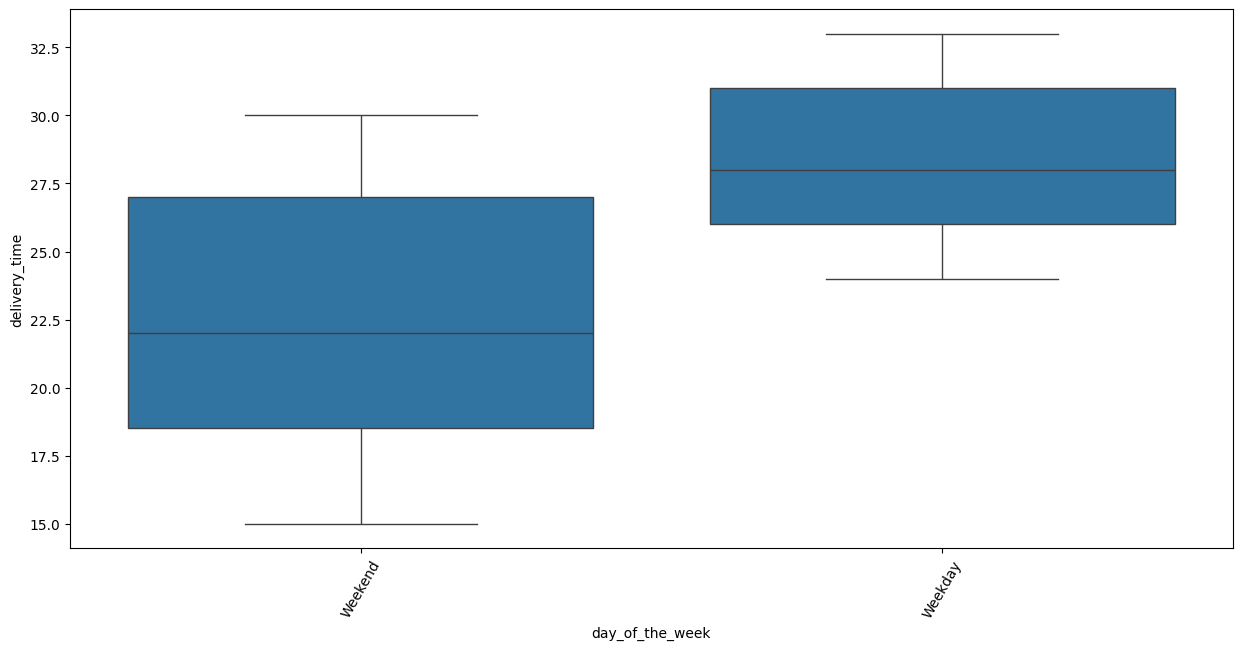

In [ ]:
# Relationship between day of the week and delivery time

#Box plot for day of the week vs delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y= 'delivery_time', data = df)
plt.xticks(rotation = 60)
plt.show()



Observations:
  *  On weekends the delivery time is faster than weekdays
  

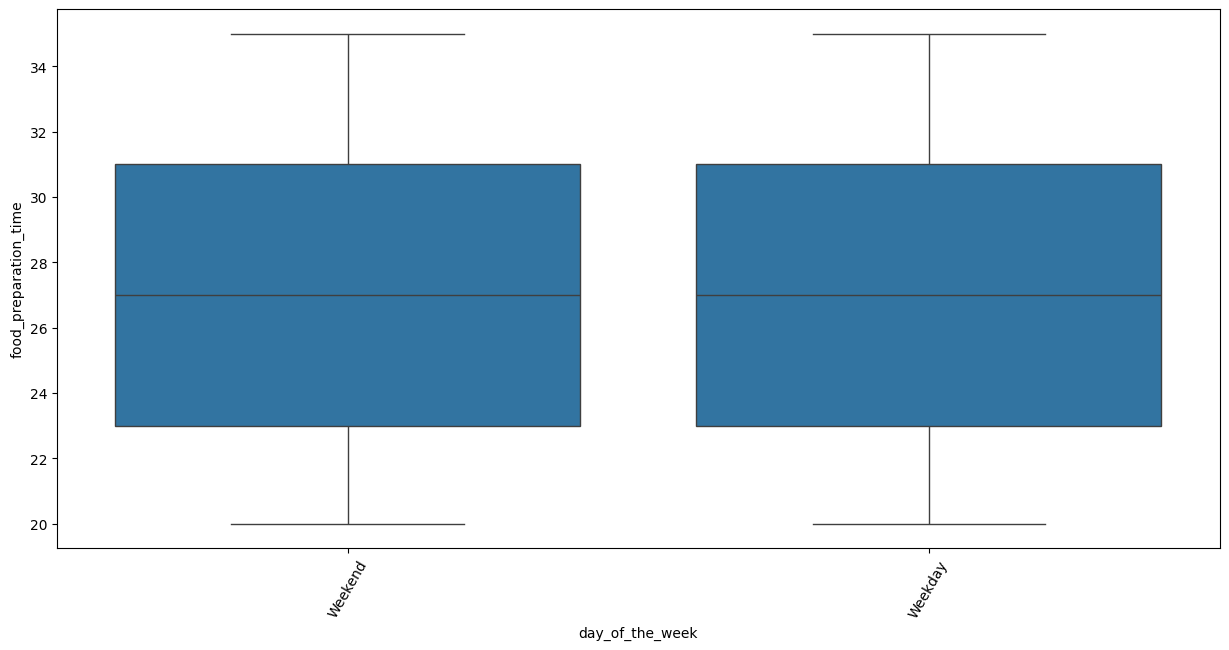

In [ ]:
# Relationship between day of the week and food preparation time

#Box plot for day of the week vs food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y= 'food_preparation_time', data = df)
plt.xticks(rotation = 60)
plt.show()

Observations:
  *  Food preparation time is basically the same on weekends and weekdays

Relationship between rating and other variables

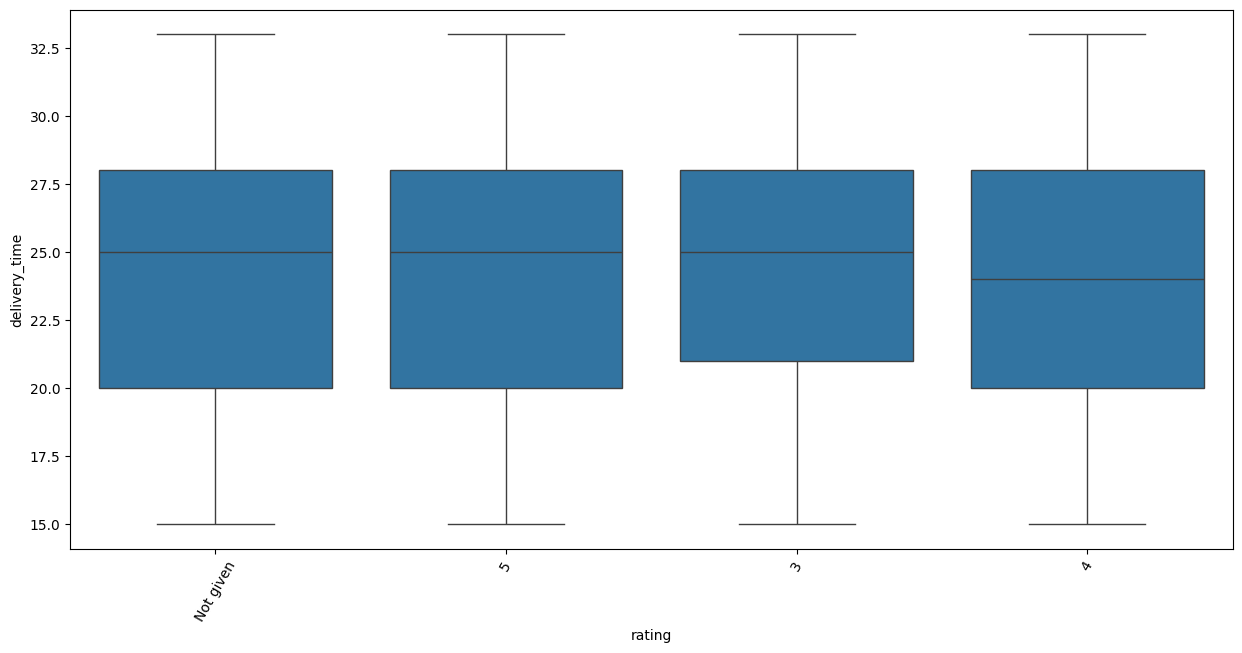

In [ ]:
# Relationship between rating and delivery time

#Box plot for rating vs delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'rating', y= 'delivery_time', data = df)
plt.xticks(rotation = 60)
plt.show()

Observations:
  * It seems the rating has not been influenced by the delivery time

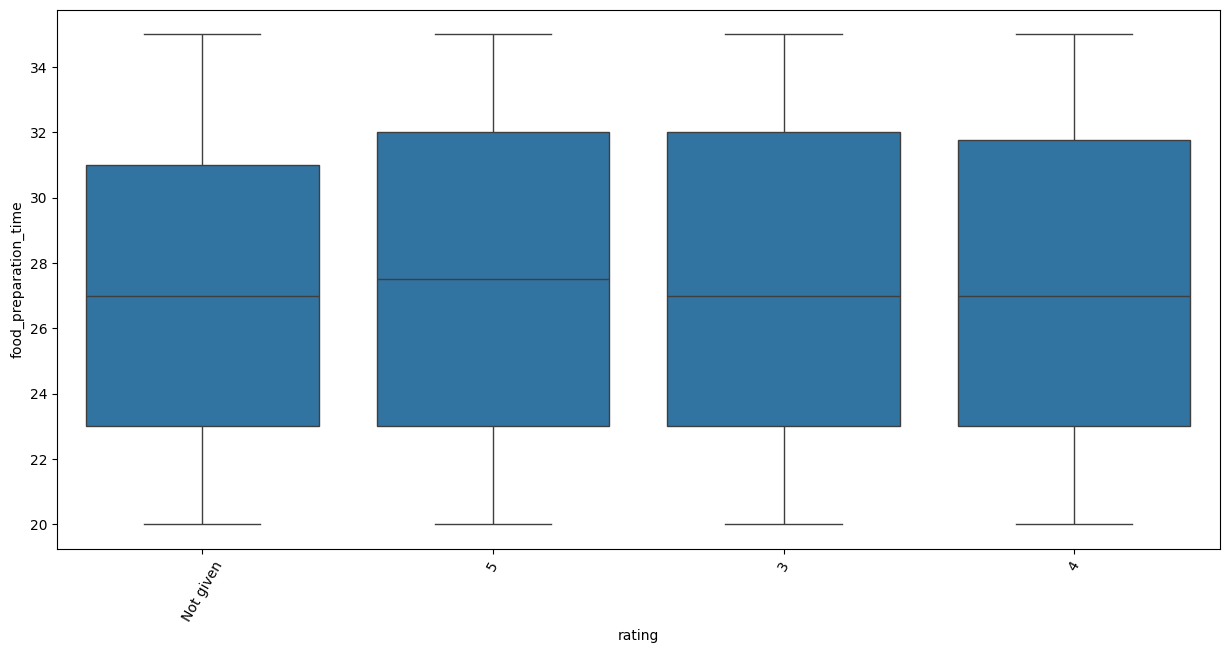

In [ ]:
# Relationship between rating and cost of order

#Box plot for rating vs food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'rating', y= 'food_preparation_time', data = df)
plt.xticks(rotation = 60)
plt.show()

Observations:
  * Rating not affected by food preparation time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Group by restaurant and calculate rating count and average rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

promotional_offer_restaurants = restaurant_stats[
    (restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)
]
print(promotional_offer_restaurants)




                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations: These 4 restaurants fit the requirements to get the advertisement offer. Having a count of ratings over 50 and an average rating over 4


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Select orders with cost between $5 and $20 and calculate total revenue
Orders5to20 = df.loc[(df['cost_of_the_order'] >= 5) & (df['cost_of_the_order'] <= 20), 'cost_of_the_order']
total5to20=Orders5to20.sum()*0.15

# Select orders with cost greater than $20 and calculate total revenue
Orders20plus= df.loc[(df['cost_of_the_order'] > 20),'cost_of_the_order']
total20plus= Orders20plus.sum()*0.25


# Calculate the overall total revenue
total_revenue = total5to20 + total20plus.sum()

print('The total revenue generated is', total_revenue)


The total revenue generated is 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the percentage of orders taking more than 60 minutes for preparation and delivery
Orders60minsplus = (df['food_preparation_time'] + df['delivery_time'] > 60).mean() * 100
print('The percentage of orders taking more than 60 minutes is %',Orders60minsplus)

The percentage of orders taking more than 60 minutes is % 10.537407797681771


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Set boolean variables equal true when day of the week is Weekend or Weekday separetely
WeekendOrders= df['day_of_the_week']=='Weekend'
WeekdayOrders= df['day_of_the_week']=='Weekday'
print('The delivery time on weekends has a mean of ',df.loc[WeekendOrders, 'delivery_time'].mean())

print('The delivery time on weekdays has a mean of ',df.loc[WeekdayOrders, 'delivery_time'].mean())

The delivery time on weekends has a mean of  22.4700222057735
The delivery time on weekdays has a mean of  28.340036563071298


#### Observations: Looking at the data we can conclude that orders on weekdays take longer to deliver than orders on weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


1.   The most popular restaurant is Shake Shack
2.   The delivery time changes during weekends and weekdays. It is higher on weekdays
3.  The most popular cuisine type is the American
4.  In most of the orders, the customers don't leave a rating
5.  The ratings don't seem to be affected by delivery time or food preparation time
6.  Only 3 cuisine types make 71% of orders (American, Japanese, Italian)




### Recommendations:

*  Optimize deliveries on weekdays, investigate what is the reason behind the increase in delivery time compared to weekend and make ajustments with staffing levels or delivery routes.
*  Promote popular cuisines. Have promotional offers on the most ordered cuisine types.
*  Encourage people to leave ratings. Since most of the orders don't have ratings encouraging customers to rate the orders will provide more information that could help the company take better decisions.
*  Leaverage the top restaurants success with marketing and promotion efforts.
*  Gather more time related information for the orders so further analysis can be done taking into account days, hours, minutes, etc.
*  Implement customer surveys with a direct feedback of different aspects of the service as food quality, delivery experince and overall satisfaction.


---